In [198]:
%matplotlib inline

In [199]:
# Imports the Google Cloud client library
from google.cloud import datastore

# Instantiates a client
datastore_client = datastore.Client()

q = datastore_client.query(kind='TemperatureRecord')

data = list(q.fetch())

In [200]:
len(data)

23798

In [201]:
origdata = data.copy()
data[1]

<Entity('TemperatureRecord', 4517335503208448) {'temp': 19.8125, 'time': datetime.datetime(2018, 3, 24, 18, 53, 55, 933000, tzinfo=<UTC>)}>

In [202]:
data[1]['time']

datetime.datetime(2018, 3, 24, 18, 53, 55, 933000, tzinfo=<UTC>)

In [203]:
import pandas as pa

In [204]:
df = pa.DataFrame(data)

In [205]:
df.head()

,temp,time
0,18.3750,2018-03-20 17:29:49.187000+00:00
1,19.8125,2018-03-24 18:53:55.933000+00:00
2,19.9375,2018-03-23 06:49:54.294000+00:00
3,17.9375,2018-03-20 16:52:02.189000+00:00
4,20.1875,2018-03-22 05:49:55.896000+00:00


In [206]:
import pytz

In [207]:
tz = pytz.timezone('America/Los_Angeles')

In [208]:
df.time = df.time.map(lambda t: t.astimezone(tz))

In [209]:
df.temp = df.temp.map(lambda c: 9/5. * c + 32.)

In [210]:
import seaborn as sns

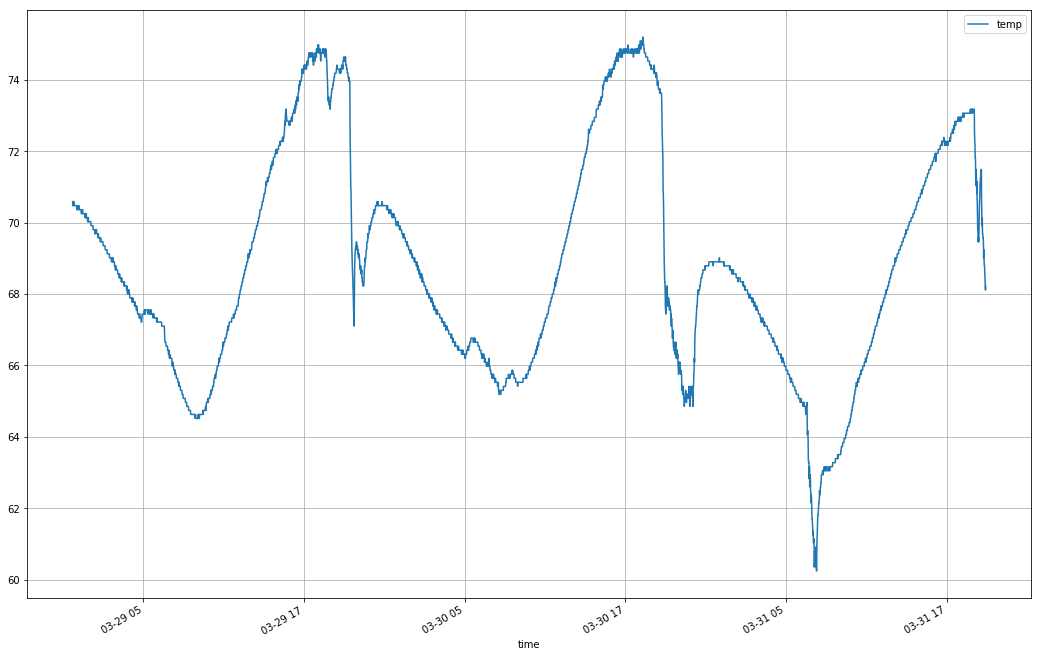

In [214]:
df.sort_values(by='time').iloc[-4000:].plot.line(x='time', y='temp', figsize=(18,12), grid=True)

In [212]:
df.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
data[0]

In [ ]:
q = datastore_client.query(kind='TemperatureRecord', order=('-time',))
d = list(q.fetch(1))
d

In [ ]:
d[0]['temp']*9/5 + 32